# Exploring SVMs  
This notebook illsutrates some of the SVM concepts that we convered in class.

## Using package e1071

In [1]:
#install the package
install.packages("e1071")

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [13]:
# load the library
# Note that e1071 contains other classification and clustering methods and is a useful library to keep in your toolbox.
library(e1071)

Credits - Section 9.6  
Example from Introduction to Statistical Learning  
http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

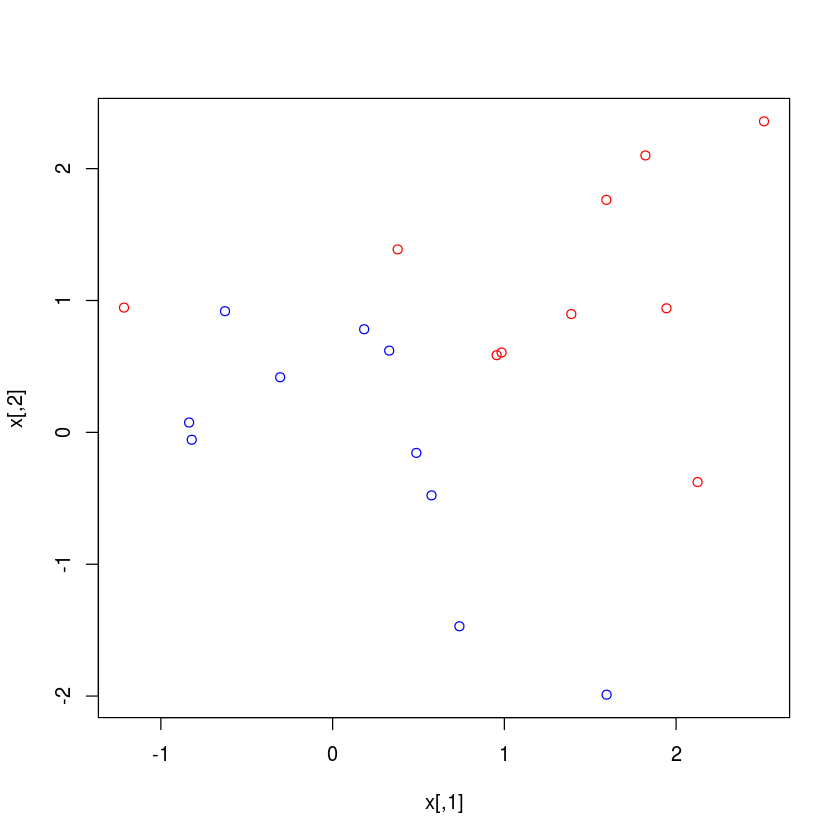

In [14]:
# Let's Generate some data
set.seed (1)
x <- matrix (rnorm (20*2) , ncol =2)
y <- c(rep (-1,10) , rep (1 ,10) )
x[y==1 ,]= x[y==1,] + 1
plot(x, col =(3-y))

Note - To use svm()  to perform classification. Encode the response as a factor variable. 

In [4]:
dat<-data.frame(x=x, y=as.factor(y))

In [15]:
# svm i sused to train a support vector machine
# Various arguments are interesting - In this case you will see that we are using a linear kernel
# You can also explore other kerney and observe how the decision boundary changes.
# Various kernels are available - linear, polynomial, radial basis, and sigmoid.


# You will also notice that we are using a cost = 10. 
# Cost refers to the C constant of the regularization term in a Lagrang formulae
svmfit<-svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)

[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




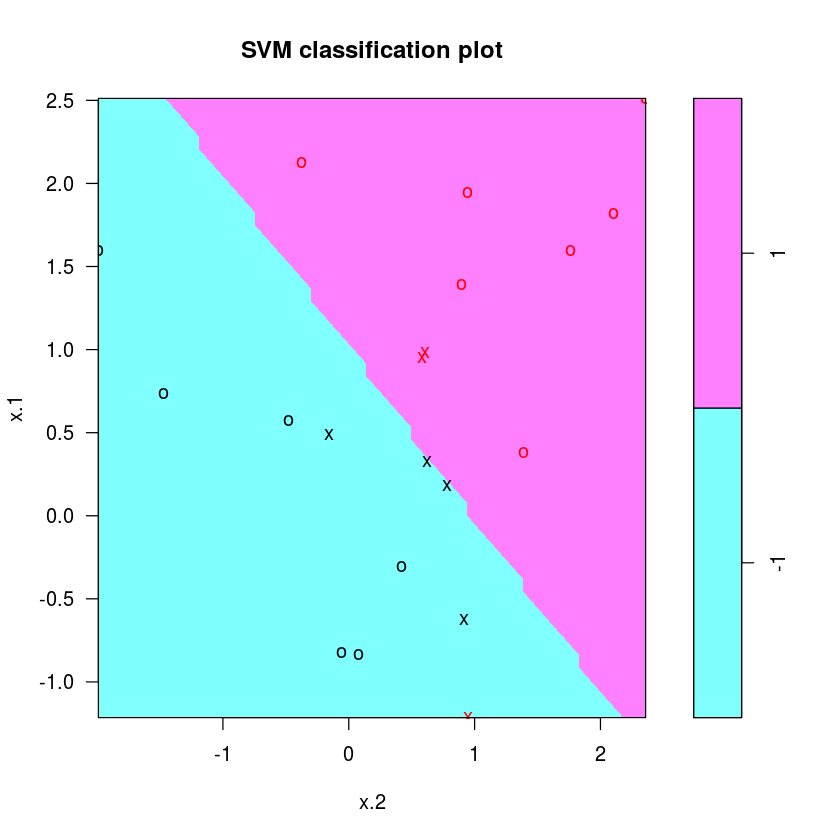

In [17]:
# Visualize the decision boundary
plot(svmfit , dat)
svmfit$index
summary (svmfit )

In [12]:
# Try using a smaller cost value and see how it impacts the decision boundary
svmfit<-svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




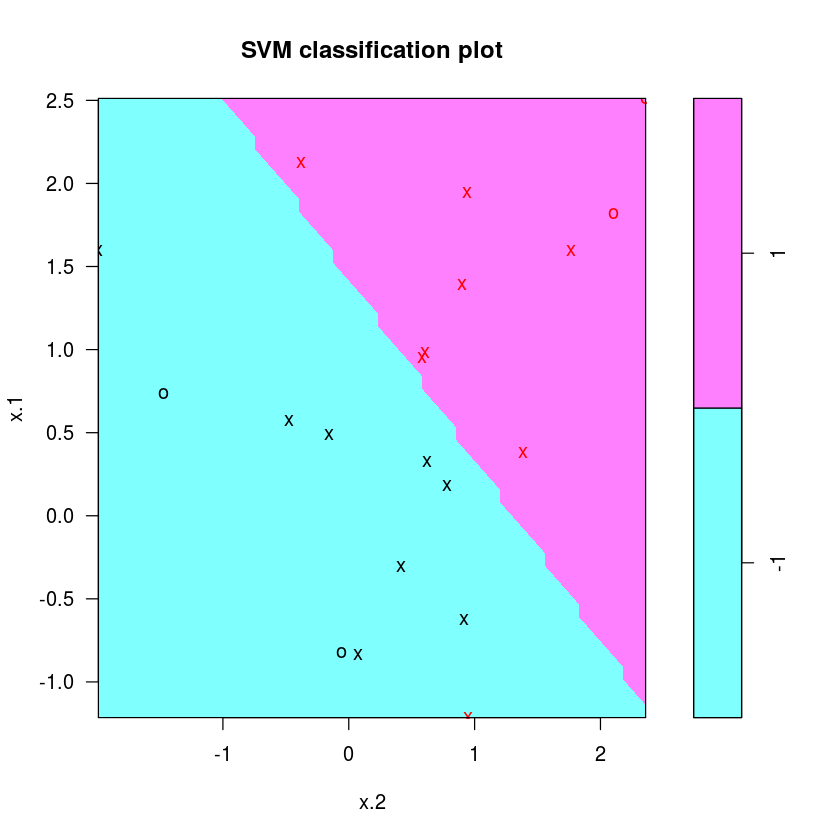

In [8]:
plot(svmfit , dat)
svmfit$index
summary (svmfit )

## Parameter Tuning

In [9]:
# specify a range of value for cost
set.seed (1)
tune.out<-tune(svm ,y~.,data=dat ,kernel ="linear",
        ranges =list(cost=c(0.001 , 0.01, 0.1, 1,5,10,100) ))
summary(tune.out)

# get the best model
bestmod <-tune.out$best.model
summary (bestmod )


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




## Using Kernlab  
Credits: https://escience.rpi.edu/data/DA/svmbasic_notes.pdf

In [2]:
# Generate data using Gaussian distribution
numDataPoints <- 150 # number of data points
numDim <- 2 # dimension

In [4]:
# Specify variance of the distribution
sigma <- 1 

 # Specify centre of the distribution of positive examples
meanpos <- 0

 # centre of the distribution of negative examples
meanneg <- 3

# number of positive and negative examples
npos <- round(numDataPoints/2) 
nneg <- numDataPoints -npos


In [11]:
# Generate positive and negative examples
xpos <- matrix(rnorm(npos*p,mean=meanpos,sd=sigma),npos,numDim)
xneg <- matrix(rnorm(nneg*p,mean=meanneg,sd=sigma),npos,numDim)
x <- rbind(xpos,xneg)
str(x)

 num [1:150, 1:2] 0.9415 -0.0959 -0.2773 0.9695 0.4315 ...


In [9]:
# Specify the label
y <- matrix(c(rep(1,npos),rep(-1,nneg)))
table(y)

y
-1  1 
75 75 

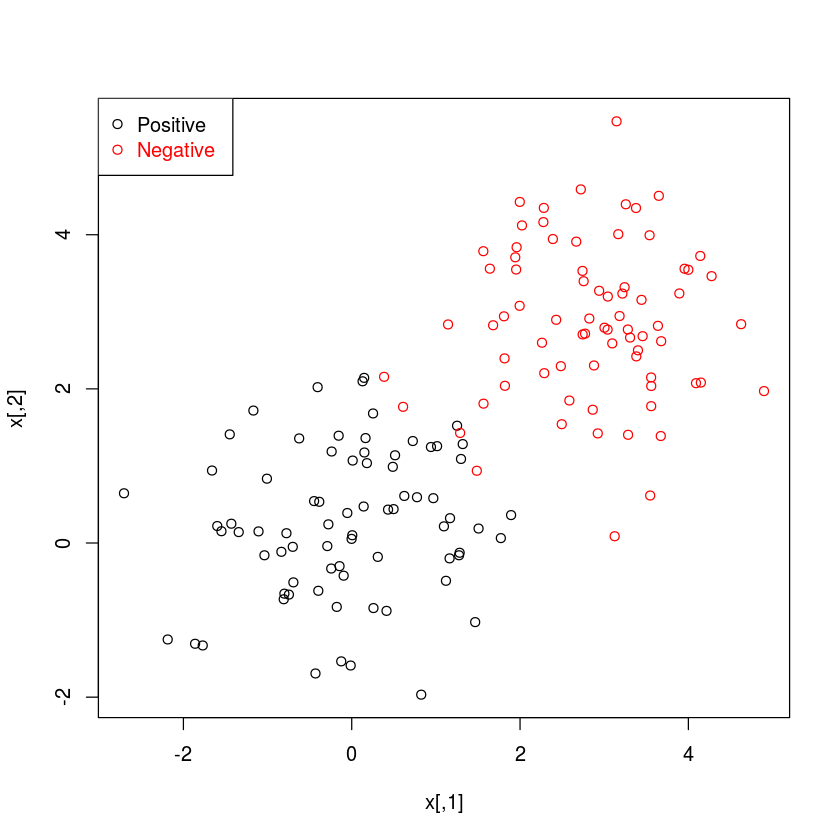

In [13]:
# Visualize the data
plot(x,col=ifelse(y>0,1,2))
legend("topleft",c('Positive','Negative'),col=seq(2),pch=1,text.col=seq(2))


In [14]:
# Specify training and test datasets
## Prepare a training and a test set ##
ntrain <- round(n*0.8) # number of training examples
tindex <- sample(n,ntrain) # indices of training samples
xtrain <- x[tindex,]
xtest <- x[-tindex,]
ytrain <- y[tindex]
ytest <- y[-tindex]
istrain=rep(0,n)
istrain[tindex]=1

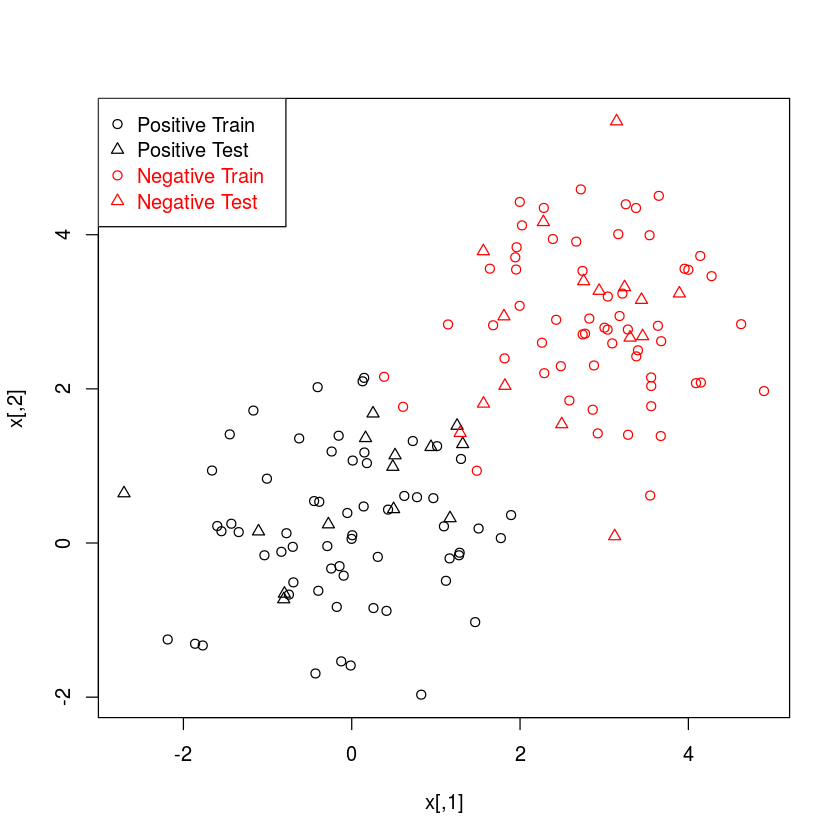

In [17]:
# Visualize
plot(x,col=ifelse(y>0,1,2),pch=ifelse(istrain==1,1,2))
legend("topleft",c('Positive Train','Positive Test','Negative Train','Negative Test'),
       col=c(1,1,2,2),pch=c(1,2,1,2),text.col=c(1,1,2,2))


In [28]:
# Use the kernlab package
library(kernlab)



In [37]:
# Train the SVM with different kernel (linear, rbf, polynomial)
# Observe the number of suppor vectors

# SVM Training linear
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=100,scaled=c())
svp

# SVM Training with rbf
svpRBF <- ksvm(xtrain,ytrain,type="C-svc",kernel='rbfdot',C=100,scaled=c())
svpRBF


# SVM Training with polynomial
svpPoly <- ksvm(xtrain,ytrain,type="C-svc",kernel='polydot',C=100,scaled=c())
svpPoly

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 6 

Objective Function Value : -357.0983 
Training error : 0.008333 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.877009755092972 

Number of Support Vectors : 26 

Objective Function Value : -137.499 
Training error : 0 

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Polynomial kernel function. 
 Hyperparameters : degree =  1  scale =  1  offset =  1 

Number of Support Vectors : 6 

Objective Function Value : -357.0991 
Training error : 0.008333 

In [30]:
# Attributes that you can access
attributes(svp)


$param
$param$C
[1] 100


$scaling
`\001NULL\001`

$coef
$coef[[1]]
[1] -100.000000 -100.000000   34.015718  100.000000   -9.881195   75.865477


$alphaindex
$alphaindex[[1]]
[1]  6 12 42 44 70 81


$b
[1] -18.97572

$obj
[1] -357.0983

$SVindex
[1]  6 12 42 44 70 81

$nSV
[1] 6

$prior
$prior[[1]]
$prior[[1]]$prior1
[1] 61

$prior[[1]]$prior0
[1] 59



$prob.model
$prob.model[[1]]
NULL


$alpha
$alpha[[1]]
[1] 100.000000 100.000000  34.015718 100.000000   9.881195  75.865477


$type
[1] "C-svc"

$kernelf
function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must be a vector")
    if (is(x, "vector") && is.null(y)) {
        crossprod(x)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
            stop("number of dimension must be the same on both data points")
        crossprod(x, y)
    }
}
<environment: 0x47d38b8>
attr(,"kpar")
list()
attr(,"class")
[1

In [31]:
# For example, the support vectors
alpha(svp)
alphaindex(svp)
b(svp)


[[1]]
[1] 100.000000 100.000000  34.015718 100.000000   9.881195  75.865477

[[1]]
[1]  6 12 42 44 70 81

[1] -18.97572

### Visualizing the plots  
Decision boundary and support vectors

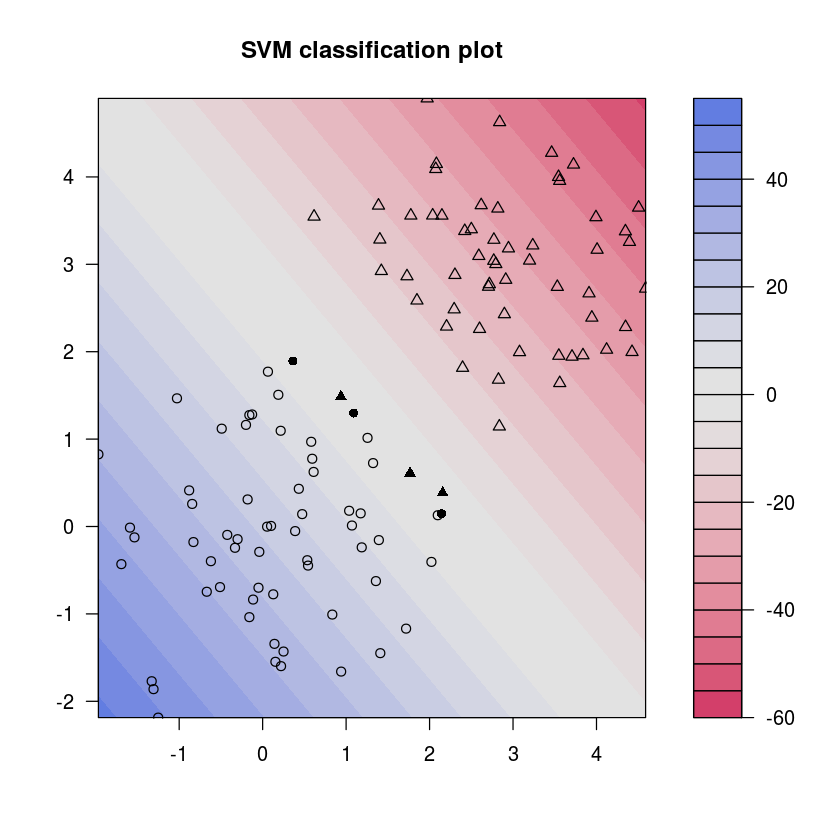

In [40]:
# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)


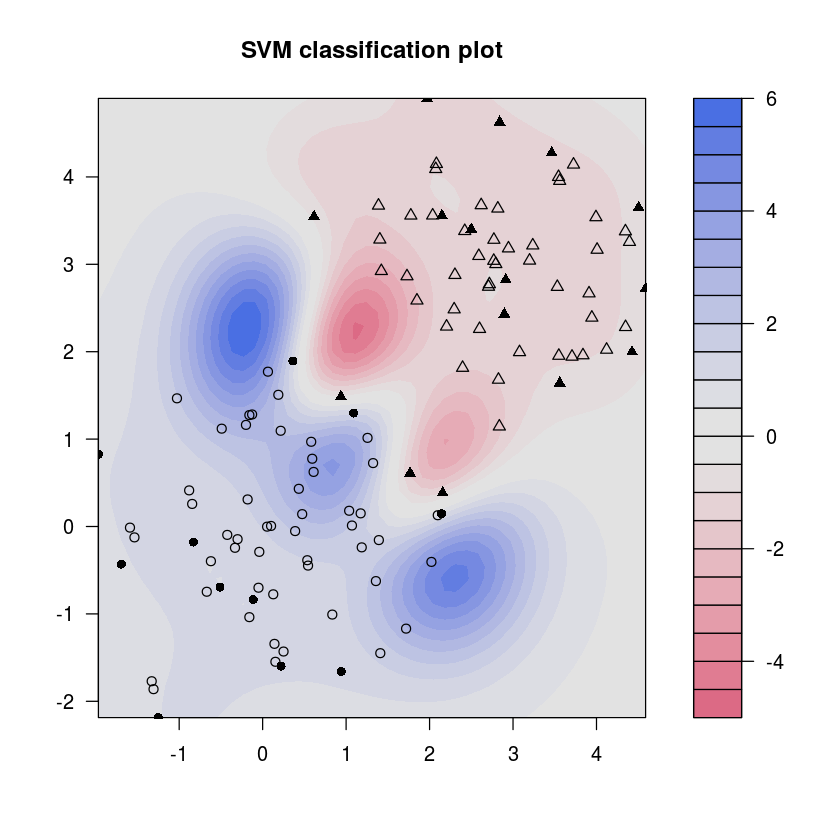

In [41]:
plot(svpRBF,data=xtrain)


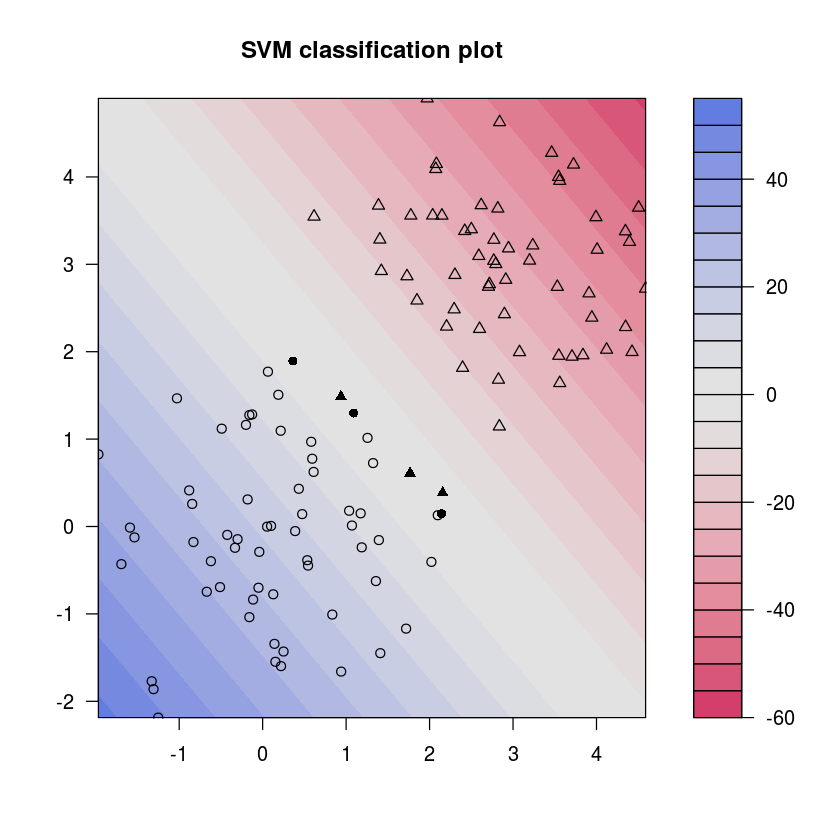

In [42]:
plot(svpPoly,data=xtrain)